<a href="https://colab.research.google.com/github/itsDV7/DataScience_with_Python/blob/main/DataPreprocessing_Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

**Step 2: Importing dataset**

In [ ]:
data = pd.read_csv("Data.csv")
df = data.copy()

**Step 3: Handling the missing data**

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


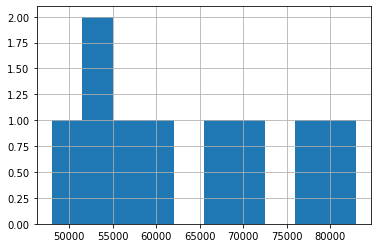

In [ ]:
df.Salary.hist()

In [ ]:
df['Salary'] = df.Salary.fillna(np.median(df.Salary.dropna().values))

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


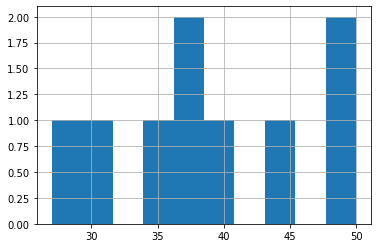

In [ ]:
df.Age.hist()

In [ ]:
df['Age'] = df.Age.fillna(np.mean(df.Age.dropna().values))

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,61000.0,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


**Step 4: Encoding categorical data**

In [ ]:
LE = LabelEncoder()

In [ ]:
df['Purchased'] = LE.fit_transform(df.Purchased)

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,0
1,Spain,27.000000,48000.0,1
2,Germany,30.000000,54000.0,0
3,Spain,38.000000,61000.0,0
4,Germany,40.000000,61000.0,1
5,France,35.000000,58000.0,1
6,Spain,38.777778,52000.0,0
7,France,48.000000,79000.0,1
8,Germany,50.000000,83000.0,0
9,France,37.000000,67000.0,1


**Step 5: Creating a dummy variable**

In [ ]:
OHE = OneHotEncoder()

In [ ]:
encoded_array = OHE.fit_transform(df.Country.values.reshape(-1, 1)).toarray()
encoded_array

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
dfOneHot = pd.DataFrame(encoded_array, columns = ["Country_"+str(int(i)) for i in range(encoded_array.shape[1])]) 
df = pd.concat([dfOneHot, df], axis=1)

In [ ]:
df= df.drop(['Country'], axis=1)

In [ ]:
df

,Country_0,Country_1,Country_2,Age,Salary,Purchased
0,1.0,0.0,0.0,44.000000,72000.0,0
1,0.0,0.0,1.0,27.000000,48000.0,1
2,0.0,1.0,0.0,30.000000,54000.0,0
3,0.0,0.0,1.0,38.000000,61000.0,0
4,0.0,1.0,0.0,40.000000,61000.0,1
5,1.0,0.0,0.0,35.000000,58000.0,1
6,0.0,0.0,1.0,38.777778,52000.0,0
7,1.0,0.0,0.0,48.000000,79000.0,1
8,0.0,1.0,0.0,50.000000,83000.0,0
9,1.0,0.0,0.0,37.000000,67000.0,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
X = df.iloc[:,:-1]
X

,Country_0,Country_1,Country_2,Age,Salary
0,1.0,0.0,0.0,44.000000,72000.0
1,0.0,0.0,1.0,27.000000,48000.0
2,0.0,1.0,0.0,30.000000,54000.0
3,0.0,0.0,1.0,38.000000,61000.0
4,0.0,1.0,0.0,40.000000,61000.0
5,1.0,0.0,0.0,35.000000,58000.0
6,0.0,0.0,1.0,38.777778,52000.0
7,1.0,0.0,0.0,48.000000,79000.0
8,0.0,1.0,0.0,50.000000,83000.0
9,1.0,0.0,0.0,37.000000,67000.0


In [ ]:
y = df.iloc[:,-1]
y

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Purchased, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
print(f'X Train:\n{X_train}\n')
print(f'X Test:\n{X_test}\n')
print(f'Y Train:\n{y_train}\n')
print(f'Y Test:\n{y_test}\n')

X Train:
   Country_0  Country_1  Country_2   Age   Salary
4        0.0        1.0        0.0  40.0  61000.0
0        1.0        0.0        0.0  44.0  72000.0
3        0.0        0.0        1.0  38.0  61000.0
1        0.0        0.0        1.0  27.0  48000.0
7        1.0        0.0        0.0  48.0  79000.0
8        0.0        1.0        0.0  50.0  83000.0
5        1.0        0.0        0.0  35.0  58000.0

X Test:
   Country_0  Country_1  Country_2        Age   Salary
2        0.0        1.0        0.0  30.000000  54000.0
9        1.0        0.0        0.0  37.000000  67000.0
6        0.0        0.0        1.0  38.777778  52000.0

Y Train:
4    1
0    0
3    0
1    1
7    1
8    0
5    1
Name: Purchased, dtype: int64

Y Test:
2    0
9    1
6    0
Name: Purchased, dtype: int64



**Step 7: Feature Scaling**

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_train

array([[0.        , 1.        , 0.        , 0.56521739, 0.37142857],
       [1.        , 0.        , 0.        , 0.73913043, 0.68571429],
       [0.        , 0.        , 1.        , 0.47826087, 0.37142857],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.91304348, 0.88571429],
       [0.        , 1.        , 0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.        , 0.34782609, 0.28571429]])

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[0.        , 1.        , 0.        , 0.13043478, 0.17142857],
       [1.        , 0.        , 0.        , 0.43478261, 0.54285714],
       [0.        , 0.        , 1.        , 0.51207729, 0.11428571]])

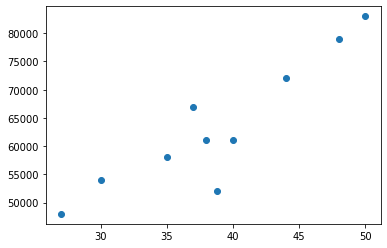

In [ ]:
plt.scatter(df.Age, df.Salary)

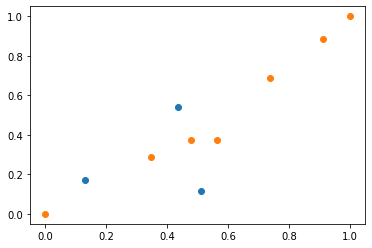

In [ ]:
plt.scatter(X_test[:,3], X_test[:,4])
plt.scatter(X_train[:,3], X_train[:,4])